In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    average_precision_score, precision_recall_curve, roc_curve
)
from synthetic_generator import SyntheticRareEventGenerator

# Set consistent plot style
sns.set(style="whitegrid")

# Ensure export folder exists
os.makedirs("./synthetic_datasets", exist_ok=True)

# Diverse synthetic configs
configurations = [
    {"name": "baseline_easy", "weights": [0.95, 0.05], "noise": 0.05, "drift": 0.0, "sep": 2.0},
    {"name": "noisy_overlap", "weights": [0.98, 0.02], "noise": 0.2, "drift": 0.0, "sep": 0.5},
    {"name": "high_drift", "weights": [0.97, 0.03], "noise": 0.1, "drift": 0.6, "sep": 1.0},
    {"name": "imbalanced_sparse", "weights": [0.995, 0.005], "noise": 0.1, "drift": 0.1, "sep": 1.2},
    {"name": "mixed_realistic", "weights": [0.96, 0.04], "noise": 0.15, "drift": 0.3, "sep": 0.8},
]

# Loop through each configuration
for config in configurations:
    gen = SyntheticRareEventGenerator(
        n_samples=5000,
        n_features=15,
        n_informative=5,
        n_redundant=3,
        class_sep=config["sep"],
        weights=config["weights"],
        flip_y=0.01,
        random_state=42
    )

    df = gen.generate()
    df = gen.add_noise(df, noise_level=config["noise"])
    df = gen.inject_drift(df, drift_strength=config["drift"])

    # 🔁 Rename target column
    df.rename(columns={'target': 'rare_event'}, inplace=True)

    file_name = f"{config['name']}_w{int(config['weights'][1]*100)}_n{int(config['noise']*100)}_d{int(config['drift']*100)}.csv"
    df.to_csv(f"./synthetic_datasets/{file_name}", index=False)
    print(f"Saved: {file_name}")

Saved: baseline_easy_w5_n5_d0.csv
Saved: noisy_overlap_w2_n20_d0.csv
Saved: high_drift_w3_n10_d60.csv
Saved: imbalanced_sparse_w0_n10_d10.csv
Saved: mixed_realistic_w4_n15_d30.csv



📊 Visualizing: baseline_easy_w5_n5_d0.csv


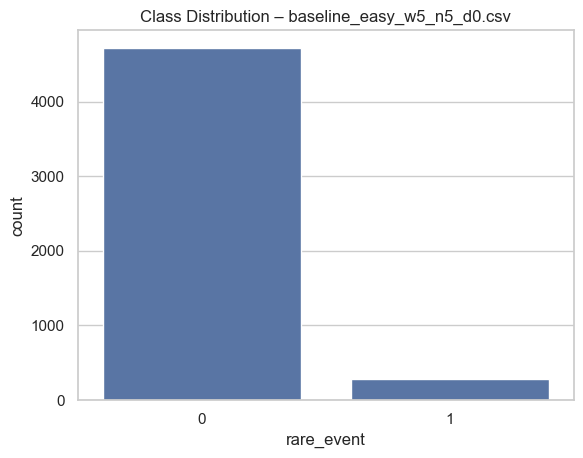

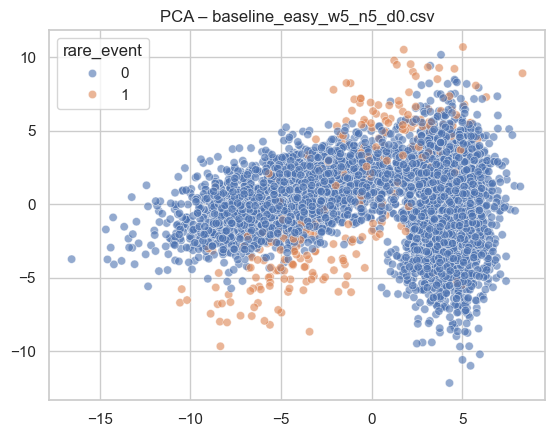


📊 Visualizing: high_drift_w3_n10_d60.csv


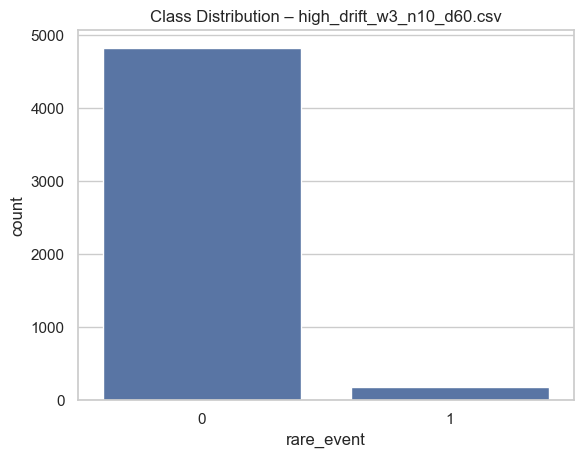

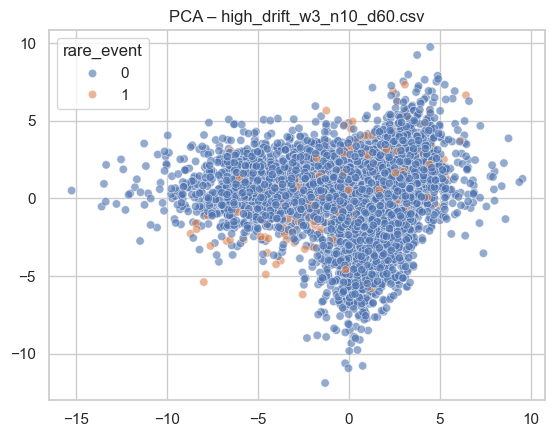


📊 Visualizing: imbalanced_sparse_w0_n10_d10.csv


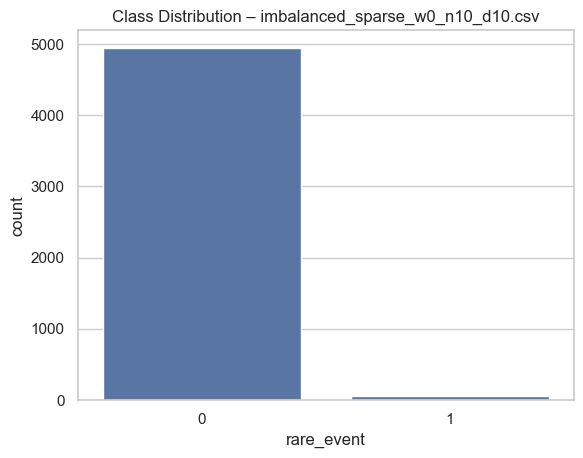

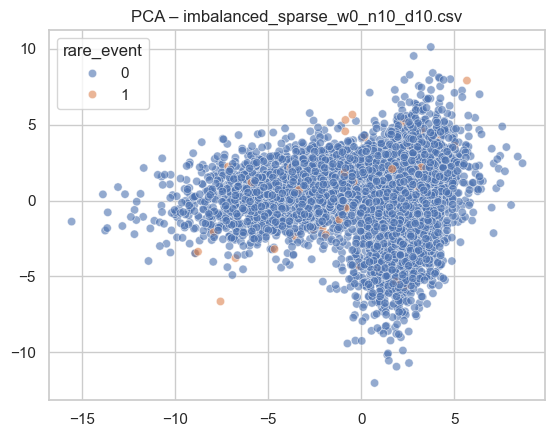


📊 Visualizing: mixed_realistic_w4_n15_d30.csv


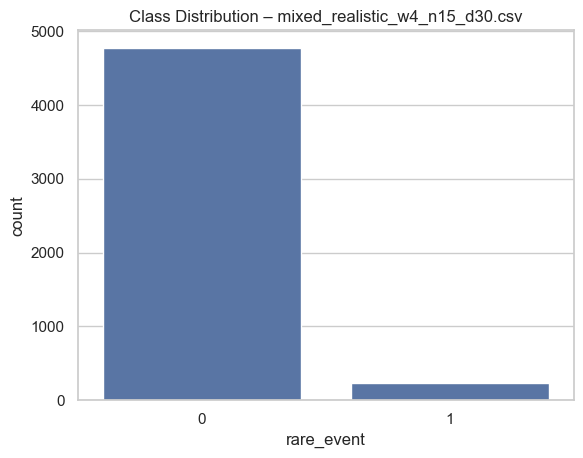

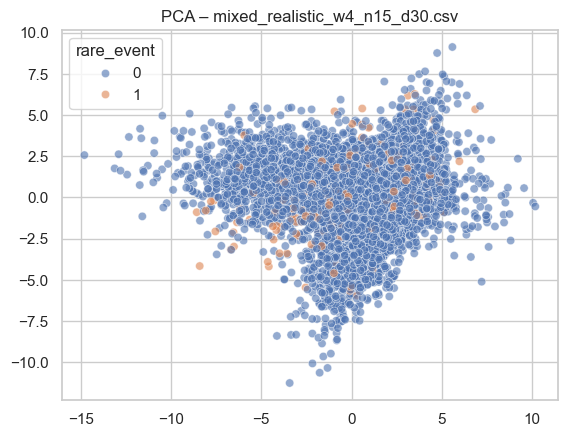


📊 Visualizing: noisy_overlap_w2_n20_d0.csv


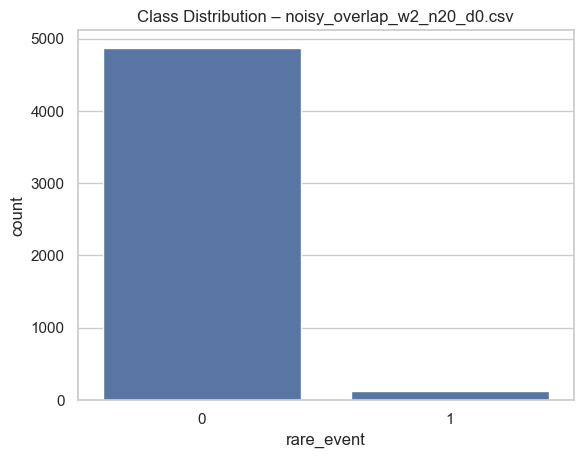

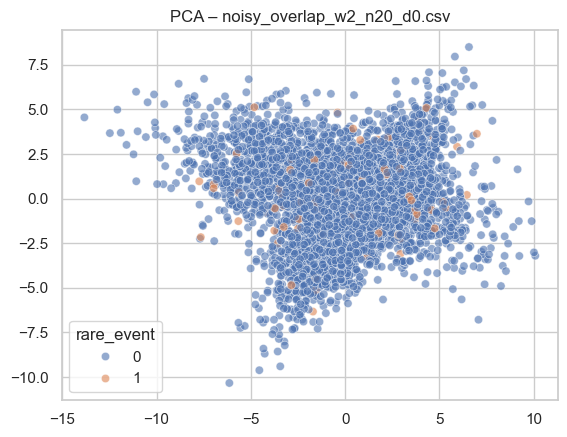

In [3]:
import glob

# Load all synthetic CSVs
csv_paths = sorted(glob.glob("./synthetic_datasets/*.csv"))

# Visualize each
for path in csv_paths:
    df = pd.read_csv(path)
    name = os.path.basename(path)

    print(f"\n📊 Visualizing: {name}")

    # Class balance
    sns.countplot(data=df, x='rare_event')
    plt.title(f"Class Distribution – {name}")
    plt.show()

    # PCA
    try:
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        comp = pca.fit_transform(df.drop('rare_event', axis=1))
        sns.scatterplot(x=comp[:, 0], y=comp[:, 1], hue=df['rare_event'], alpha=0.6)
        plt.title(f"PCA – {name}")
        plt.show()
    except Exception as e:
        print(f"PCA failed for {name}: {e}")